# 状態密度の計算

$k$次元系で、エネルギー固有値が

$$
E_(n_1, \ldots, n_k ) = \sum_{l = 1}^{k} \cos \left(\frac{2 \pi n_l}{N} \right)
$$

で与えられる系の状態密度を計算する。このシートでは任意の$ k$について計算するプログラミングを与えた。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
class Calculate:
    def __init__(self, dimension, time, Emin, Emax, dens: bool = True):
        self.dens = dens
        self.L = 100
        self.N = int( time**(1/dimension))
        self.dim = dimension
        self.Es = np.linspace(Emin, Emax, self.L)
        self.hist = self.__get_hist()
    def N_dim_sumation(self, one_dim_array):
        def __pinch_it_with_bracket(content, times):
            for _ in range(times - 1):
                content = [ content]
            return content
        
        result = __pinch_it_with_bracket(np.copy(one_dim_array), 1)
        for times in range(2, self.dim + 1):
            result = result + np.array(
                __pinch_it_with_bracket(
                    np.copy(one_dim_array),
                    times
                )
            ).T
        return result
    
    def get_eigens(self):
        return self.N_dim_sumation(
            np.cos( 2 * np.pi /self.N * np.arange(self.N))
            )

    def __get_hist(self):
        place =  np.searchsorted(self.Es, self.get_eigens())
        hist = np.histogram(place, bins=np.arange(self.L + 1), density=self.dens)
        return hist[0]

In [2]:
# 1D
one  = Calculate(1, 100000000, -1, 1, True)

## 1次元モデルのフィッティング

1次元系について、系のサイズ$N$を無限大とした極限のもとで解析解が求まる：
$$
D(E) = \frac{1}{2 t}\frac{N}{2 \pi} \frac{ 1}{ \sqrt{ 1- \left( \frac{E}{2 t} \right)^2}}
$$

そこで関数形として
$$
f(x;a, b) =a \frac{1 }{ \sqrt{ 1-\left( \frac{x}{b} \right)^2}}
$$
を仮定し、$a,b$についてを最小二乗法にて計算する。

In [3]:
from scipy.optimize import curve_fit

def func( x, a, b):
    return a * 1/ np.sqrt( 1- ( x/b)**2)

popt, pcov = curve_fit(func, one.Es[1:-1], one.hist[1:-1]) # 発散する点を除外してcurve_fit

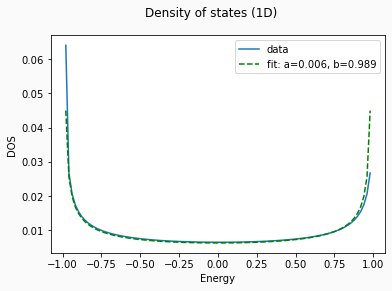

In [4]:
fig = plt.figure(facecolor='#fafafa')
ax = fig.add_subplot(111)
ax.plot(one.Es[1:-1], one.hist[1:-1], label="data") # 外れ値を除外
ax.plot(one.Es[1:-1], func(one.Es[1:-1], *popt), 'g--', label="fit: a=%5.3f, b=%5.3f" % tuple(popt))
fig.suptitle("Density of states (1D) ")
ax.set_xlabel("Energy")
_ =ax.set_ylabel("DOS")
ax.legend()
fig.savefig("DOS_1d.png", dpi=400)

In [5]:
# 2D
two = Calculate(2, 100000000, -2, 2, True)

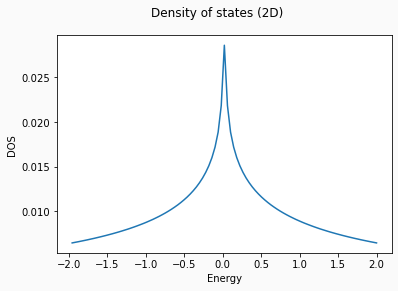

In [6]:
fig = plt.figure(facecolor='#fafafa')
ax = fig.add_subplot(111)
ax.plot(two.Es[1:], two.hist[1:]) # 外れ値を除外
fig.suptitle("Density of states (2D) ")
ax.set_xlabel("Energy")
_ =ax.set_ylabel("DOS")
fig.savefig("DOS_2d.png", dpi=400)

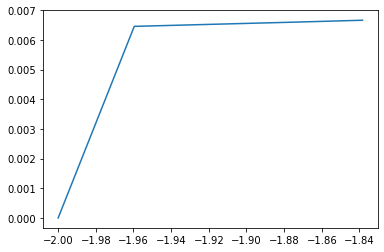

In [18]:
plt.plot(two.Es[0:5], two.hist[0:5])

In [7]:
# 3D 
three = Calculate(3, 100000000, -3, 3, True)

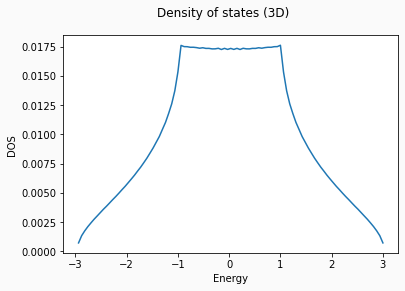

In [8]:
fig = plt.figure(facecolor='#fafafa')
ax = fig.add_subplot(111)
ax.plot(three.Es[1:], three.hist[1:]) # 外れ値を除外
fig.suptitle("Density of states (3D) ")
ax.set_xlabel("Energy")
_ =ax.set_ylabel("DOS")
fig.savefig("DOS_3d.png", dpi=400)

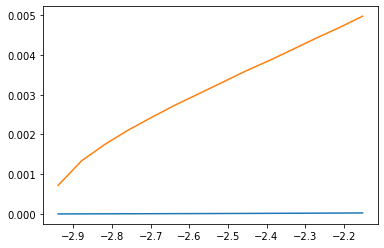

In [19]:
plt.plot(three.Es[1:15], three.hist[1:15]**2)
plt.plot(three.Es[1:15], three.hist[1:15])

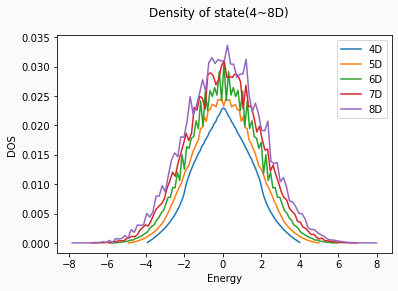

In [9]:

def plotter(dim):
    calc = Calculate(dim, 220000000, -dim, dim, True)
    ax.plot(calc.Es[1:], calc.hist[1:], label="{}D".format(dim))

fig = plt.figure(facecolor='#fafafa')
ax = fig.add_subplot(111)
fig.suptitle("Density of state(4~8D)")
for i in range(4, 9):
    plotter(i)

ax.set_xlabel("Energy")
ax.set_ylabel("DOS")
ax.legend()
fig.savefig("DOS_4-8d.png", dpi=400)